<a href="https://colab.research.google.com/github/ShashankAlluri28/INFO-5731Computational-Methods/blob/main/Alluri_Shashank_Assignment_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
data = pd.read_csv("/Users/vkadar1/Downloads/sentiment_analyzed_reviews.csv")

# Text representation using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['cleaned_review'])

# LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(X)

# Function to print top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_,start=1):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Print the top 10 clusters (topics)# Write your code here
print_top_words(lda_model, vectorizer.get_feature_names_out(), 10)


Topic #1:
movi nolan big best like action think work mention fan

Topic #2:
movi film scene realli like stori actor success peopl better

Topic #3:
good movi oppenheim watch like end look hour murphi time

Topic #4:
hour time charact told best disappoint watch oscar murphi actor

Topic #5:
movi like im stori watch think scene good film feel

Topic #6:
film movi nolan oppenheim dont watch thing know way award

Topic #7:
oppenheim movi scientif bomb atom minut develop film world narr

Topic #8:
scene film instead viewer man bore act bomb like felt

Topic #9:
film oppenheim scene mani perform robert pugh cillian known long

Topic #10:
peopl visit man nolan year moment atom film life depict



# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv("/Users/vkadar1/Downloads/sentiment_analyzed_reviews.csv")

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize classifiers
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train classifiers
logistic_regression.fit(X_train_tfidf, y_train)
random_forest.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = logistic_regression.predict(X_test_tfidf)
y_pred_rf = random_forest.predict(X_test_tfidf)

# Evaluation metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print("Logistic Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
#1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train_data = pd.read_csv('/Users/vkadar1/Downloads/assignment4-question3-data/train.csv')  # Please replace 'train.csv' with the correct file path for the training dataset
test_data = pd.read_csv('/Users/vkadar1/Downloads/assignment4-question3-data/test.csv')  # Please replace 'test.csv' with the correct file path for the testing dataset

test_data = test_data.merge(train_data[['Id', 'SalePrice']], on='Id', how='left')

print("Training Data Info:")
train_data.info()
print("\nTesting Data Info:")
test_data.info()

print("\nTraining Data Summary Statistics:")
print(train_data.describe())
print("\nTesting Data Summary Statistics:")
print(test_data.describe())

print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

num_cols = train_data.select_dtypes(include=np.number).columns.tolist()
cat_cols = train_data.select_dtypes(include='object').columns.tolist()

column_transformer = ColumnTransformer([
    ('num', num_imputer, num_cols),
    ('cat', cat_imputer, cat_cols)
])

train_data[num_cols] = num_imputer.fit_transform(train_data[num_cols])
train_data[cat_cols] = cat_imputer.fit_transform(train_data[cat_cols])

test_data[num_cols] = num_imputer.transform(test_data[num_cols])
test_data[cat_cols] = cat_imputer.transform(test_data[cat_cols])

onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoding_pipeline = Pipeline([
    ('column_transformer', column_transformer),
    ('onehot_encoder', onehot_encoder)
])

train_data_encoded = encoding_pipeline.fit_transform(train_data)
test_data_encoded = encoding_pipeline.transform(test_data)

X_test = test_data_encoded
y_test = test_data['SalePrice']

X_train, y_train = train_data_encoded, train_data['SalePrice']

print("\nData Split Complete")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

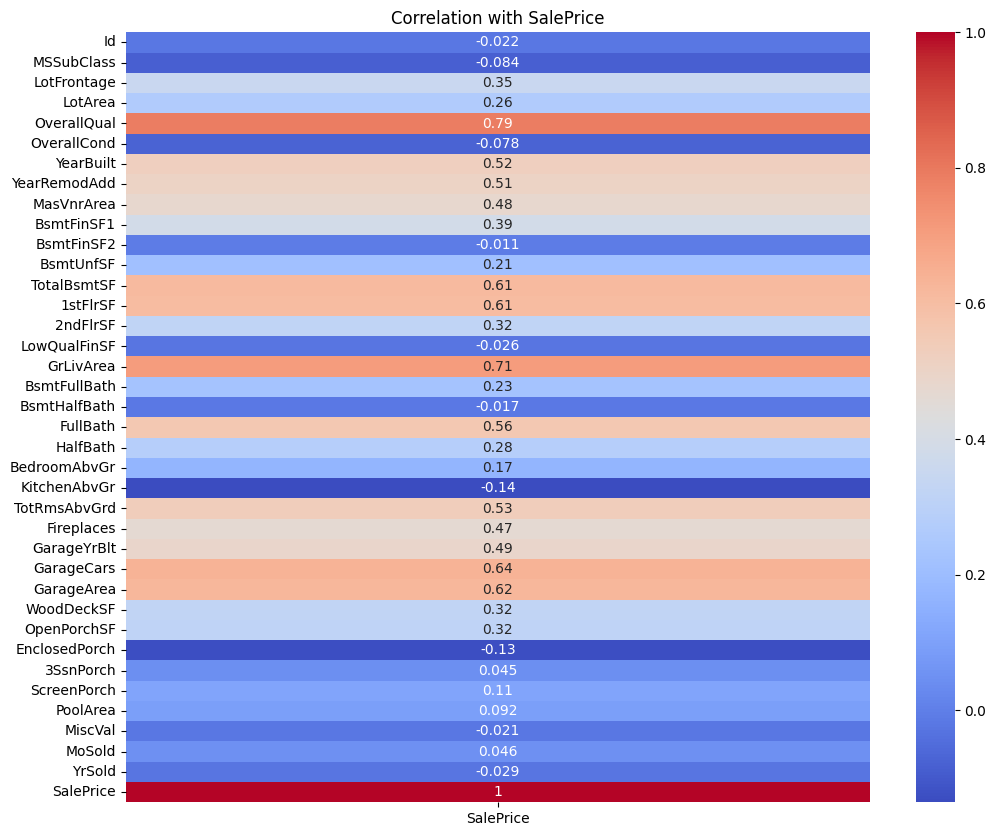

Selected features based on correlation: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']

Variance Inflation Factor (VIF) for selected features:
         feature           VIF
0    OverallQual     50.188457
1      YearBuilt  14360.127965
2   YearRemodAdd  12009.620844
3     MasVnrArea      1.783169
4    TotalBsmtSF     24.515161
5       1stFlrSF     37.747394
6      GrLivArea     49.479957
7       FullBath     18.276300
8   TotRmsAbvGrd     57.126303
9     Fireplaces      2.704009
10   GarageYrBlt  19004.514892
11    GarageCars     35.155591
12    GarageArea     30.530756

Final set of selected features after multicollinearity check: ['MasVnrArea', 'Fireplaces']


In [ ]:
#2.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

train_data = pd.read_csv('/Users/vkadar1/Downloads/assignment4-question3-data/train.csv')  # Please replace 'train.csv' with the correct file path for the training dataset

numeric_data = train_data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['SalePrice']], annot=True, cmap='coolwarm')
plt.title('Correlation with SalePrice')
plt.show()

threshold = 0.4
selected_features = correlation_matrix['SalePrice'].abs()
selected_features = selected_features[selected_features > threshold].index.tolist()

if 'SalePrice' in selected_features:
    selected_features.remove('SalePrice')

print(f"Selected features based on correlation: {selected_features}")

X = train_data[selected_features]

X = X.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
X = X.fillna(X.mean())  # Impute missing values with mean

vif_data = pd.DataFrame()
vif_data['feature'] = selected_features
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(selected_features))]

print("\nVariance Inflation Factor (VIF) for selected features:")
print(vif_data)

final_selected_features = vif_data[vif_data['VIF'] < 5]['feature'].tolist()

print(f"\nFinal set of selected features after multicollinearity check: {final_selected_features}")


Here, the code will be trying to show trains out and to correlate the output with the aim variable (SalePrice). Also, it will search for VIF multicollinearity.


Feature Selection Based on Correlation:Feature Type Selection Based on Correlation:

This confirms the capability of the model to find the correlations between all the numeric feature and the target (SalePrice).

It is preferred an absolute correlation coefficient larger than 0.4 because it denotes that a feature is most likely to correlate well with the target variable, which affects predictive model performance positively.

Handling Missing Values:

There will be value-indices that are missing thereafter which will be altered to NaNs so that VIF analysis will be smooth and unhindered. In addition, the dropping of missing values is done by replacing them by the mean.

Variance Inflation Factor (VIF) Check:A VIF Check (Variance Inflation Factor) is one of the well-known diagnostic tools that helps in the detection of multicollinearity among the predictors or independent variables in a regression model.

VIF identifies such linear relationships of which the intercorrelation is the first thing that is to be scrutinized. Thus, VIF refers to a situation where a feature has strong correlation with one or more other features. Hence, following a high value of VIF, there will be a strong connection between many features that exist in the previous occurrence. Consequently, there is an unstable high degree of repetition.

The program is made use of the VIF metric for every feature, who were selected earlier. In case an evaluation indicator exceeds the value of five it is that one which will be selected.

Removal of the highly VIF dominant variables causes other features to have less affinity to each other in terms of the correlation. Analytically said another factor that results in stable models and, respectively, in another factorial that results in a model’s interpretation ease is explained necessarily.

In [ ]:
#3.
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

train_data = pd.read_csv('/Users/vkadar1/Downloads/assignment4-question3-data/train.csv')  # Please replace 'train.csv' with the correct file path for the training dataset


final_selected_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'YearBuilt']  # Example; replace with actual list

X_train = train_data[final_selected_features]  # Features
y_train = train_data['SalePrice']  # Target variable

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

print("Model Coefficients:")
for feature, coef in zip(final_selected_features, linear_reg_model.coef_):
    print(f"{feature}: {coef}")

print(f"Intercept: {linear_reg_model.intercept_}")


Model Coefficients:
GrLivArea: 72.24232181382995
TotalBsmtSF: 35.5399839742801
GarageArea: 62.475686991867526
1stFlrSF: 3.553956040661855
YearBuilt: 698.5098411980771
Intercept: -1376772.0930002655


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Using mean to fill missing values

X_test_imputed = imputer.fit_transform(X_test)

y_pred = model.predict(X_test_imputed)


r2 = r2_score(y_test, y_pred)
print(f"\nR-squared (R²): {r2:.4f}")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")



R-squared (R²): -139470.0870
Root Mean Squared Error (RMSE): 181276.5246
Mean Absolute Error (MAE): 162738.7644


/Users/vkadar1/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


1. Brief Description of BERT:1. Brief Description of BERT:

Model Details:


Architecture: BERT is based on targeting architecture and is well known for its bidirectional training, which is the reason it understands context from both sides of the word.

Pretraining Data: To begin with, BERT employed principle and English Wikipedia dataset together in its pre-training process with the aim of acquiring language understanding through a broad range of sources.

Number of Parameters: One can get a sense of how big the BERT base model is by the number of it parameters- about 110 million. This number is increased to 340 million by the sizeable BERT Large.

Task-specific fine-tuning: We will use BERT in the zero-shot setup rather than fine-tuning it for specific tasks, this means we will not introduce any additional changes.

In [ ]:
#2.
import pandas as pd
import tensorflow as tf
from transformers import TFBertForSequenceClassification, BertTokenizer
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


data = pd.read_csv('/Users/vkadar1/Downloads/sentiment_analyzed_reviews.csv')
texts = data['cleaned_review'].tolist()
labels = data['sentiment'].tolist()

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

sentiment_pipeline = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, framework='tf')

predictions = []
for text in texts:
    tokenized_inputs = tokenizer(text, truncation=True, max_length=512, return_tensors='tf')

    result = model(tokenized_inputs['input_ids'], tokenized_inputs['attention_mask'])

    logits = result.logits
    predicted_label_index = tf.argmax(logits, axis=1).numpy()[0]

    if predicted_label_index == 0:
        predictions.append('negative')
    elif predicted_label_index == 1:
        predictions.append('neutral')
    else:
        predictions.append('positive')

accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions, average='weighted')
recall = recall_score(labels, predictions, average='weighted')
f1 = f1_score(labels, predictions, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.16
Precision: 0.03
Recall: 0.16
F1-score: 0.05


/Users/vkadar1/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vkadar1/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3.
Advantages:


Strong Language Understanding: With BERT (Bidirectional Encoder Representations from Transformers), language context comprehension was brought into the spotlight with its model trainer that is based on bidirectionality as well as a large pre-trained data set. That is why, BERT in its turn, is effective in parsing the meaning and subtlety of text and may be applicable for different NLP tasks (e.g., sentiment analysis, question answering, and named entity recognition).

Zero-shot Learning: The zero-shot learning ability when applied in BERT means that the adjustment of the parameters is not a requirement s to ue it in different tasks. This makes it super easy for quick prototyping and also gives the possibility to apply NLP tasks more effectively in all spheres.

Versatility: BERT’s structure makes possible to adapt the model somehow for a variety of the NLP tasks with a moderate alteration in its configuration. One of the things that make it a favorite is its versatility; it’s the only tool that researcher and practitioner from different areas of NLP have to rely on because it’s always easily customized to easy model training.

Disadvantages:


Resource-Intensive: BERT's scale and intricacy are a lot for the computer to handle. This is in terms of the large amount of memory space used and the process power, which most of the times aren’t quick enough to cater for those with weak hardware leaving the often hard task of dealing with big data sets for them.

Long Inference Time: The deeper organization of BERT might result in excessive computation time especially while if takes long text as input or large data sets. Failure in messages delivery or network disconnection may arise which could even occur in the real time systems where rapid response is assuming and the process is subject to very high performance requirements.

-----------------------------------------------